<a href="https://colab.research.google.com/github/001hazel/Phys-134/blob/main/Muon_Physics_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Muon Lifetime Data Analysis

In the experiment we measured detected lifetimes of muons moving through a scintillator. These measured lifetimes are to be binned into data and fitted to a model of the from:

$ y(t_{j}) = Ae^{-t_{j}/τ} + B$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from google.colab import files
uploaded = files.upload()

Saving trial 1.csv to trial 1.csv


In [3]:
data = np.loadtxt('trial 1.csv')

In [ ]:
print(data)

[ 580. 7940. 2240. ...  980.  160. 4600.]


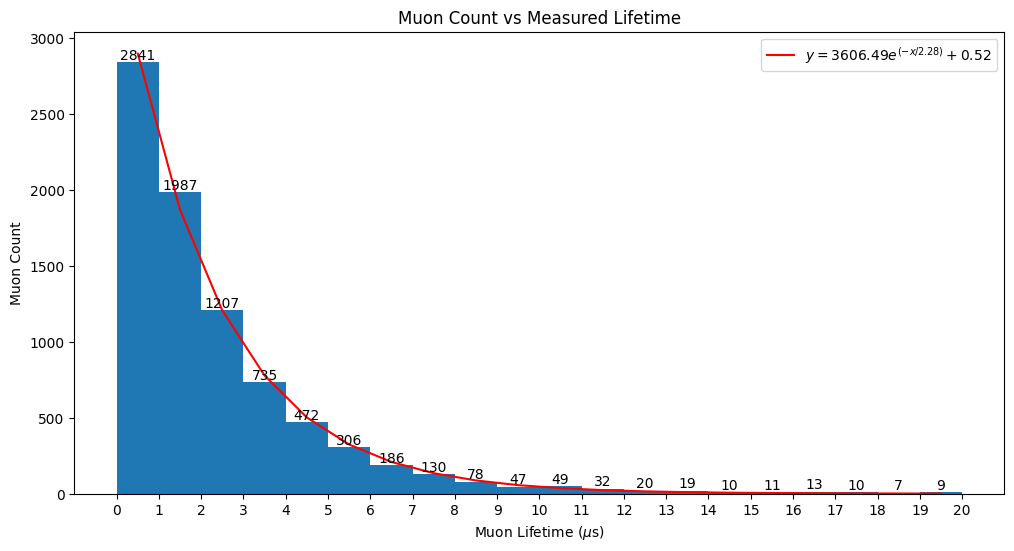

In [52]:
plt.figure(1,figsize=(12,6))
#plt.hist(data/1000,bins=20,range=(0,20))
plt.xticks(np.linspace(0,20,21))
bins,edges,bars = plt.hist(data/1000,bins=20,range=(0,20))
plt.bar_label(bars)
plt.plot(bincenters,fit_data,color='r',label = r'$y={:.2f}e^{{(-x/{:.2f})}}+{:.2f}$'.format(params[0],params[2],params[1]))
plt.legend()
plt.title('Muon Count vs Measured Lifetime')
plt.xlabel('Muon Lifetime ($\mu$s)')
plt.ylabel('Muon Count')
plt.show(1)


In [ ]:
print(bins)

[2841. 1987. 1207.  735.  472.  306.  186.  130.   78.   47.   49.   32.
   20.   19.   10.   11.   13.   10.    7.    9.]


In [ ]:
print(edges)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20.]


In [5]:
bincenters = (edges[1:]+edges[:-1])/2
print(bincenters)

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5]


In [7]:
import scipy.optimize
import scipy as sp
import scipy.stats as stat

In [29]:
def fitmodel(x,A,B,Tau):
  return A*np.exp(-1*x/Tau)+B

params,covariance = scipy.optimize.curve_fit(fitmodel,bincenters,bins,p0=None,)



In [30]:
fit_data = fitmodel(bincenters,*params)

In [39]:
print(params)

[3.60649402e+03 5.23282011e-01 2.28069746e+00]
